# Алексеева Екатерина Игоревна, БЭК215 (учебная группа - 3), dap_econ_2022_201.

### Задача 1.

In [933]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [934]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [935]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


### Часть 1

### 1.1 Разогреваемся 

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [936]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices = df_prices.set_index('Date')
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [937]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-05 to 2023-03-03
Columns: 520 entries, A to ZTS
dtypes: float64(520)
memory usage: 10.0 MB


б) [5 баллов] В колонках 'S&P-500', 'NASDAQ', 'DJI' лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ?

In [938]:
df_inf['NASDAQ'].value_counts()

False    422
True     103
Name: NASDAQ, dtype: int64

In [939]:
df_inf['NASDAQ'].sum() # Столько бумаг входили в индекс NASDAQ

103

Бумаги, которые входят во все три индекса сразу:

In [940]:
df_inf[(df_inf['NASDAQ'] >0) & (df_inf['S&P-500'] >0) & (df_inf['DJI'] >0)]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
119,CSCO,Cisco Systems,reports,Information Technology,Communications Equipment,"San Jose, California",01.12.93,858877.0,1984.0,True,True,True
247,INTC,Intel Corp.,reports,Information Technology,Semiconductors,"Santa Clara, California",31.12.76,50863.0,1968.0,True,True,True
331,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01.06.94,789019.0,1975.0,True,True,True
496,WBA,Walgreens Boots Alliance,reports,Consumer Staples,Drug Retail,"Deerfield, Illinois",31.12.79,1618921.0,2014.0,True,True,True


In [941]:
df_inf[(df_inf['NASDAQ'] >0) & (df_inf['S&P-500'] >0) & (df_inf['DJI'] >0)]['NASDAQ'].sum()

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [942]:
df_inf[(df_inf['S&P-500'] > 0) & (df_inf['Founded'] >= 1800) & (df_inf['Founded'] < 1900)]['S&P-500'].sum()

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [943]:
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров?

In [944]:
ticker1 = df_inf['Symbol'].tolist()
ticker2 = list(df_prices.columns)


In [945]:
k = 0 # считаем тикеры, которые есть в обоих списках
for i in ticker1:
    if i in ticker2:
        k+=1
k

462

In [946]:
len(ticker2)

520

In [947]:
len(ticker2) - k # нашли кол-во тикеров, которые попали в таблицу с ценами, но не попали в таблицу с информацией

58

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [948]:
sectors = df_inf['GICS Sector'].unique()

In [949]:
# считаем, сколько компаний в каком секторе
HC = 0
Ind = 0
CD = 0
IT = 0
CS = 0
U = 0
F = 0
RE = 0
M = 0
E = 0
Nan = 0
ComS = 0
for i in df_inf['GICS Sector']:

    if i == sectors[0]:
        HC +=1
    elif i == sectors[1]:
        Ind+=1
    elif i == sectors[2]:
        CD+=1
    elif i == sectors[3]:
        IT +=1
    elif i == sectors[4]:
        CS +=1
    elif i ==sectors[5]:
        U +=1
    elif i == sectors[6]:
        F +=1
    elif i == sectors[7]:
        RE +=1
    elif i == sectors[8]:
        M+=1
    elif i == sectors[9]:
        E +=1
    elif i == sectors[10]:
        Nan +=1
    elif i == sectors[11]:
        ComS += 1

In [950]:
q = [HC, Ind, CD, IT, CS, U, F, RE, M, E, Nan, ComS]
q

[62, 73, 61, 71, 33, 28, 66, 31, 28, 26, 0, 26]

Самые крупные сектора: Industrials, Consumer Discretionary, Financials (расположены в порядке убывания кол-ва компаний).

In [951]:
comps3 = ['Industrials', 'Consumer Discretionary', 'Financials']
q = sorted(q)

In [952]:
df_SnP = df_inf[['S&P-500', 'GICS Sector']]
df_SnP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   S&P-500      525 non-null    bool  
 1   GICS Sector  505 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.7+ KB


In [953]:
df_SnP = df_SnP[(df_SnP['S&P-500'] >0)]
comp_big = 0
for i in df_SnP['GICS Sector']:
    if i in comps3:
        comp_big +=1
comp_big

200

200 компаний из индекса S&P-500 в сумме приходится на  3 самых крупных сектора.

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

In [954]:
import random
random.seed(42)

random_tickers = random.sample(ticker2, 5)
# Источник: https://egorovegor.ru/python-select-random-element

In [955]:
random_tickers

['CRL', 'ALK', 'LKQ', 'ISRG', 'HPQ']

In [956]:
df_prices[['CRL', 'ALK', 'LKQ', 'ISRG', 'HPQ']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-05 to 2023-03-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRL     2518 non-null   float64
 1   ALK     2518 non-null   float64
 2   LKQ     2518 non-null   float64
 3   ISRG    2518 non-null   float64
 4   HPQ     2518 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


In [957]:
X = df_prices.index
X

DatetimeIndex(['2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-11', '2013-03-12', '2013-03-13', '2013-03-14',
               '2013-03-15', '2013-03-18',
               ...
               '2023-02-17', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

In [958]:
Y = df_prices['CRL']

In [959]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [960]:
# Настройка графиков
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 5),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

### CRL

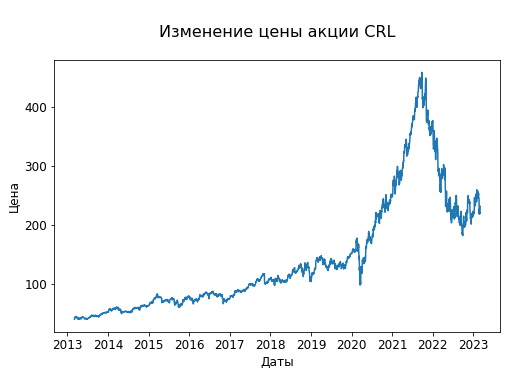

In [961]:
# Динамика цен для акции CRL
plt.plot(X, df_prices['CRL'])
plt.title('\nИзменение цены акции CRL\n')
plt.xlabel("Даты")
plt.ylabel("Цена")
plt.show()

Виден стабильный рост с 2013 по 2020 год, затем стоимость бумаги упала, связано это наиболее вероятно с кризисом из-за COVID-19. Далее стоимость акций резко пошла вверх в 2021 встретила свой пик, а зачем также быстро снизилась. Это скорее всего связано со спецификой компании, так как она занимается медицинскими исследованиями.

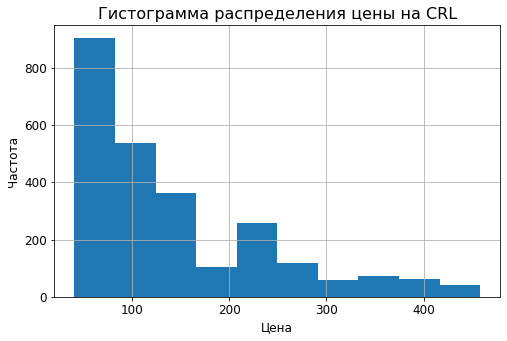

In [962]:
h = df_prices['CRL'].hist()
plt.title("Гистограмма распределения цены на CRL")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Распределение цены на акции CRL не похоже на нормальное, здесь верхушки столбиков гистограммы скорее напоминают экспоненциальное распределение.

### ALK

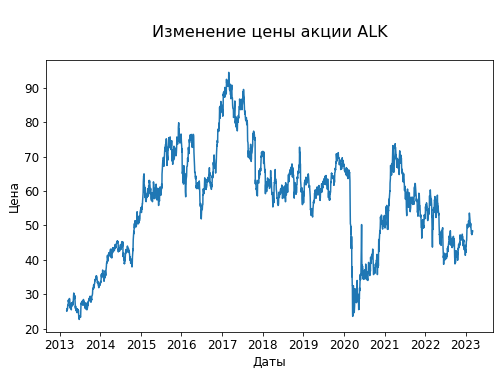

In [963]:
# Динамика цен для акции ALK
plt.plot(X, df_prices['ALK'])
plt.title('\nИзменение цены акции ALK\n')
plt.xlabel("Даты")
plt.ylabel("Цена")
plt.show()

Данная бумага довольно волатильна, однако также прослеживается кризис начала 2020 года в динамике цен.

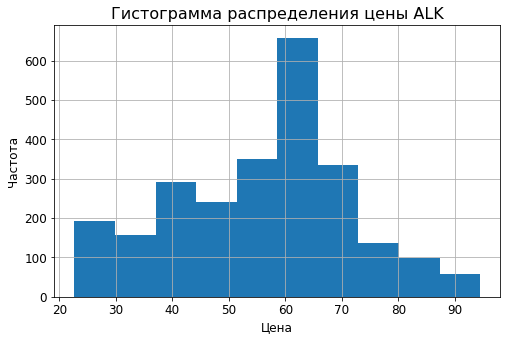

In [964]:
h = df_prices['ALK'].hist()
plt.title("Гистограмма распределения цены ALK")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Данное распределение очень смутно напоминает нормальное, "хвосты" сильно отличаются друг от друга.

### LKQ

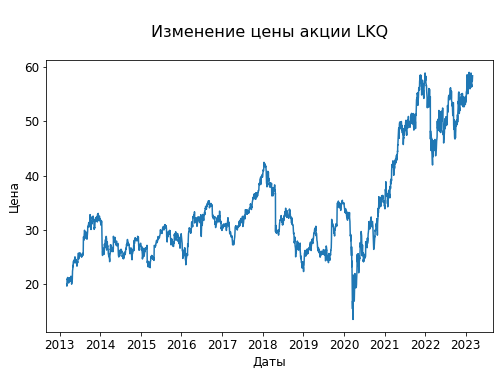

In [965]:
# Динамика цен для акции LKQ
plt.plot(X, df_prices['LKQ'])
plt.title('\nИзменение цены акции LKQ\n')
plt.xlabel("Даты")
plt.ylabel("Цена")
plt.show()

Здесь также отражен кризис времен Коронавируса.

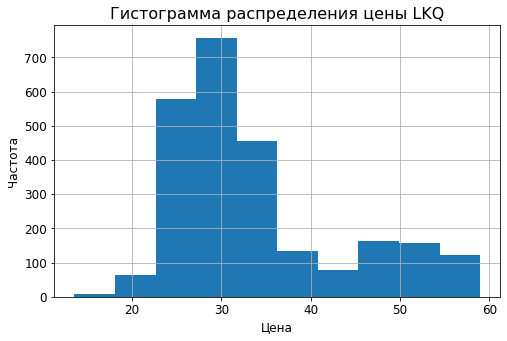

In [966]:
h = df_prices['LKQ'].hist()
plt.title("Гистограмма распределения цены LKQ")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Распределение не напоминает нормальное.

### ISRG

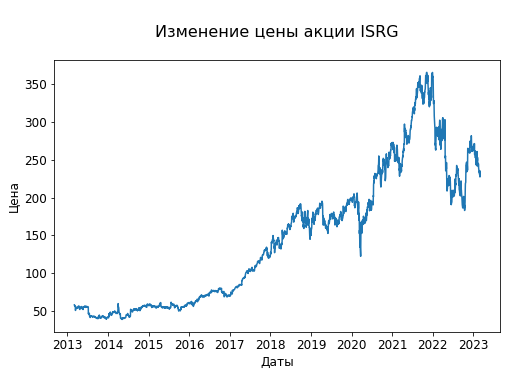

In [967]:
# Динамика цен для акции ISRG
plt.plot(X, df_prices['ISRG'])
plt.title('\nИзменение цены акции ISRG\n')
plt.xlabel("Даты")
plt.ylabel("Цена")
plt.show()

Виден резкий рост, начиная с 2017 года. На данном графике также видно сильное снижение цены акций в 2021 году из-за кризиса, но данное уменьшение стоимости сравнимо с последующими скачками цен, бумага стала более волатильной.

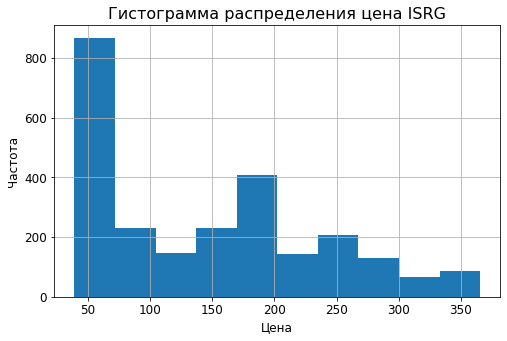

In [968]:
h = df_prices['ISRG'].hist()
plt.title("Гистограмма распределения цена ISRG")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Распределение не похоже на нормальное.

### HPQ

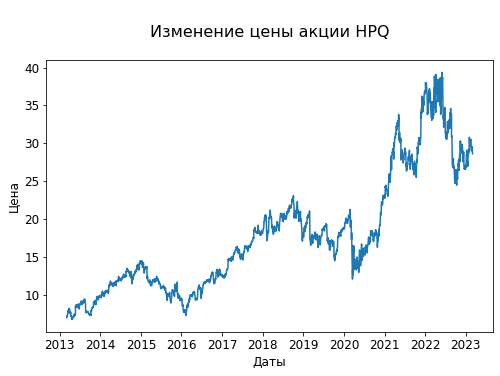

In [969]:
# Динамика цен для акции HPQ
plt.plot(X, df_prices['HPQ'])
plt.title('\nИзменение цены акции HPQ\n')
plt.xlabel("Даты")
plt.ylabel("Цена")
plt.show()

Слабо на общем фоне виден кризис.

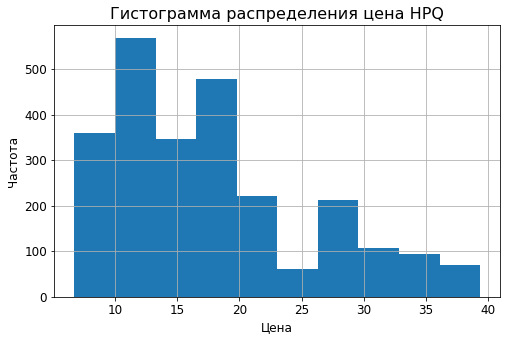

In [970]:
h = df_prices['HPQ'].hist()
plt.title("Гистограмма распределения цена HPQ")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Распределение не похоже на нормальное.

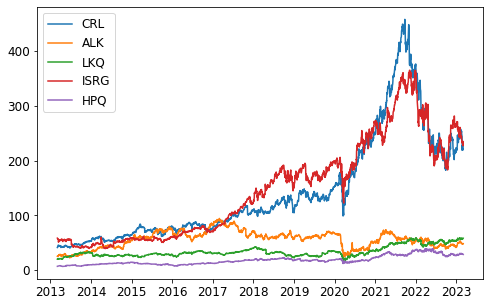

In [971]:
# Общий график по всем акциям
plt.plot(X, df_prices['CRL'], label='CRL')
plt.plot(X, df_prices['ALK'], label='ALK')
plt.plot(X, df_prices['LKQ'], label='LKQ')
plt.plot(X, df_prices['ISRG'], label='ISRG')
plt.plot(X, df_prices['HPQ'], label='HPQ')
plt.legend();

Итог:

1) Распределение стоимости акций скорее не похоже на нормальное.

2) Общая тенденция рынка - это рост за все года; в последнее время некоторые компании выбились вперед или испытали резкое увеличение стоимости акций. На графиках диманики цен хорошо просматривается кризис 2020 года, связанный с ковидом.

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [972]:
df_prices 

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,266.250000,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2023-02-28,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,265.549988,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2023-03-01,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,263.589996,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007


In [973]:
df_prices_last = df_prices[df_prices.index > '2022-03-03'] #Отсчитываю последний год с 3 марта 2022 года

In [974]:
df_prices_last

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-04,133.014832,14.590000,199.439529,162.187515,145.039047,145.500046,142.699997,119.287392,46.020000,309.469452,...,81.153603,51.823463,84.173775,116.495461,119.443909,394.239990,63.467316,108.940002,225.500000,195.261322
2022-03-07,129.488037,12.840000,194.314056,158.340820,143.969757,143.070084,131.589996,116.781982,44.270000,300.465881,...,84.077797,50.768654,82.327385,111.167648,115.715004,381.649994,60.400234,107.879997,204.369995,186.581512
2022-03-08,128.474701,13.510000,193.609421,156.492020,141.754089,142.645355,142.130005,114.080063,44.070000,297.116669,...,84.714745,49.723709,81.330139,113.071136,114.792702,383.920013,60.613766,108.489998,198.630005,179.935242
2022-03-09,132.388947,14.300000,197.760010,161.968842,143.382126,144.048004,148.309998,116.320190,45.560001,304.800232,...,79.899002,50.581360,84.509483,113.836456,116.667068,399.109985,63.214962,109.080002,212.350006,188.059555
2022-03-10,133.451965,14.200000,197.798584,157.565521,143.700012,144.383835,151.800003,114.954491,45.200001,304.898712,...,82.379257,49.960304,82.179283,113.640221,118.352997,388.790009,62.622898,103.330002,208.410004,187.702454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,266.250000,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2023-02-28,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,265.549988,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2023-03-01,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,263.589996,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007


In [975]:
df_prices_last = df_prices_last.median().to_frame()

In [976]:
df_prices_last = df_prices_last.rename(columns = {0:'Median_LY'})

In [977]:
df_prices_last

,Median_LY
A,132.596802
AAL,14.420000
AAP,175.320679
AAPL,148.957520
ABBV,147.750000
...,...
ZBRA,307.000000
ZION,52.101707
ZM,84.080002
ZS,150.919998


In [978]:
df_prices_last.reset_index(inplace= True )

In [979]:
df_prices_last = df_prices_last.rename(columns = {'index':'Symbol'})

In [980]:
df_prices_last

,Symbol,Median_LY
0,A,132.596802
1,AAL,14.420000
2,AAP,175.320679
3,AAPL,148.957520
4,ABBV,147.750000
...,...,...
515,ZBRA,307.000000
516,ZION,52.101707
517,ZM,84.080002
518,ZS,150.919998


In [981]:
df_sectors = df_inf[['Symbol', 'GICS Sector']]
df_sectors

,Symbol,GICS Sector
0,A,Health Care
1,AAL,Industrials
2,AAP,Consumer Discretionary
3,AAPL,Information Technology
4,ABBV,Health Care
...,...,...
520,ZBH,Health Care
521,ZBRA,Information Technology
522,ZION,Financials
523,ZM,NaN


In [982]:
df_sector_median = df_sectors.merge(df_prices_last, on = "Symbol", how='left')
df_sector_median

,Symbol,GICS Sector,Median_LY
0,A,Health Care,132.596802
1,AAL,Industrials,14.420000
2,AAP,Consumer Discretionary,175.320679
3,AAPL,Information Technology,148.957520
4,ABBV,Health Care,147.750000
...,...,...,...
520,ZBH,Health Care,116.716660
521,ZBRA,Information Technology,307.000000
522,ZION,Financials,52.101707
523,ZM,NaN,84.080002


In [983]:
d = dict()
for i in df_sector_median['GICS Sector'].unique():
    V = df_sector_median.loc[df_sector_median['GICS Sector'] == i]
    if len(V) >0:
        V = V.dropna(subset = ['Median_LY'])
        d[i] = np.quantile(V['Median_LY'], 0.95)
d

{'Health Care': 523.7102600097655,
 'Industrials': 431.95527496337894,
 'Consumer Discretionary': 1763.375,
 'Information Technology': 406.4559173583984,
 'Consumer Staples': 243.98006439208984,
 'Utilities': 140.30509376525876,
 'Financials': 350.0975036621094,
 'Real Estate': 308.7859680175781,
 'Materials': 289.9202606201172,
 'Energy': 165.0238792419434,
 'Communication Services': 257.44750289917005}

In [984]:
df_MS = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_MS.columns = ['Sector', 'Median']

In [985]:
df_MS #нашли 95% квантиль для каждого сектора по медианам за последний год

,Sector,Median
0,Health Care,523.710260
1,Industrials,431.955275
2,Consumer Discretionary,1763.375000
3,Information Technology,406.455917
4,Consumer Staples,243.980064
5,Utilities,140.305094
6,Financials,350.097504
7,Real Estate,308.785968
8,Materials,289.920261
9,Energy,165.023879


### 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [986]:
df_prices_diff = df_prices.diff()

In [987]:
df_prices_shift = df_prices.shift()

In [988]:
df_prices_return = df_prices_diff/df_prices_shift

In [989]:
df_prices_return

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


In [990]:
df_prices_return = df_prices_return.iloc [1: , :]

In [991]:
df_prices_return

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 


In [992]:
prices_cols = df_prices_return.columns.values.tolist()

In [993]:
random.seed(1)
random_cols = random.sample(ticker2, 5)

In [994]:
random_cols #выбрали случайные акции

['DHR', 'BIO', 'JPM', 'CTAS', 'WY']

In [995]:
params = {'legend.fontsize': 12,
          'figure.figsize': (20, 5),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

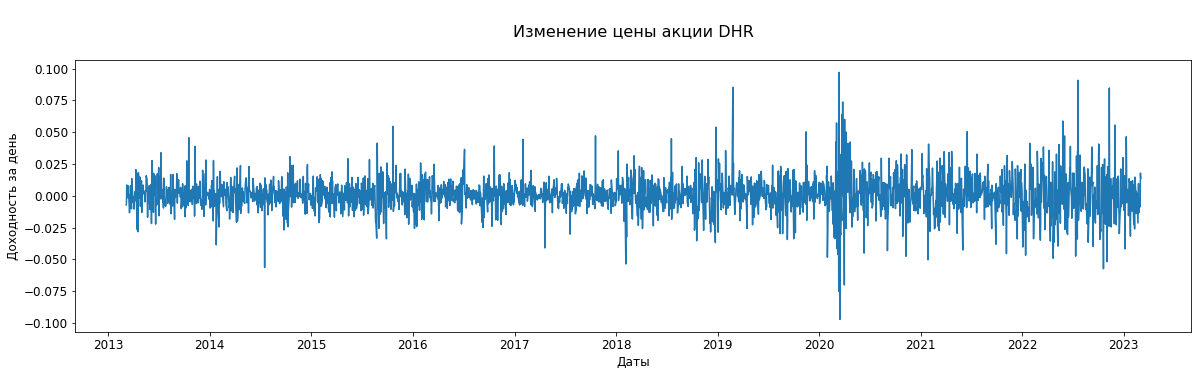

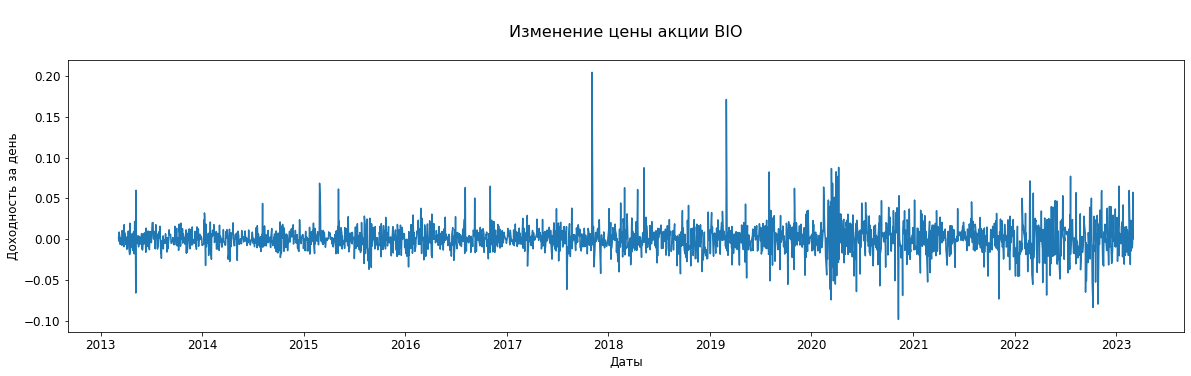

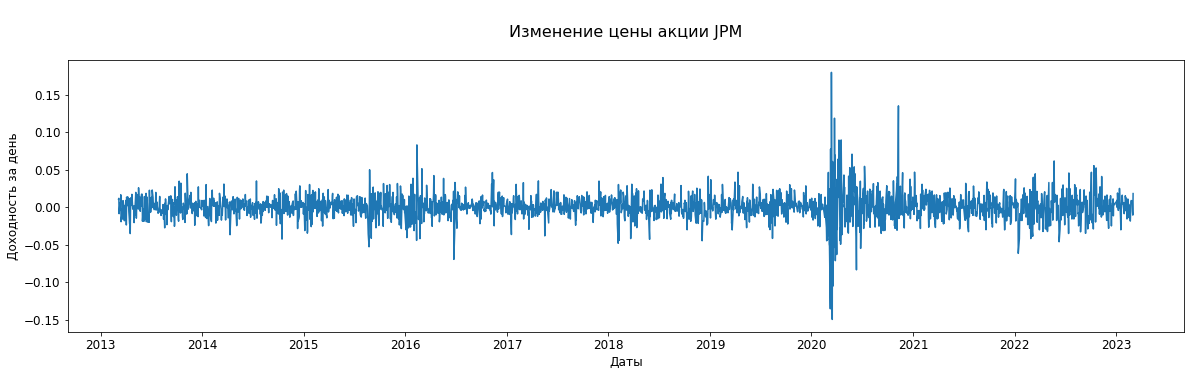

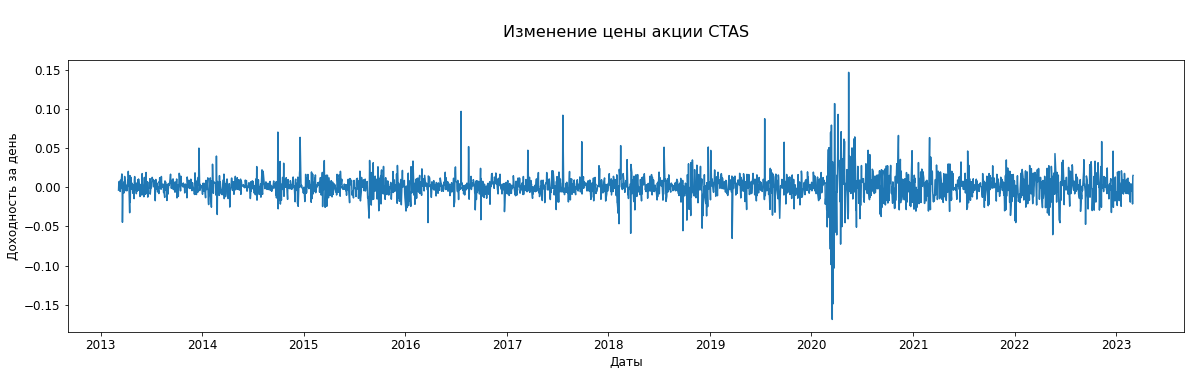

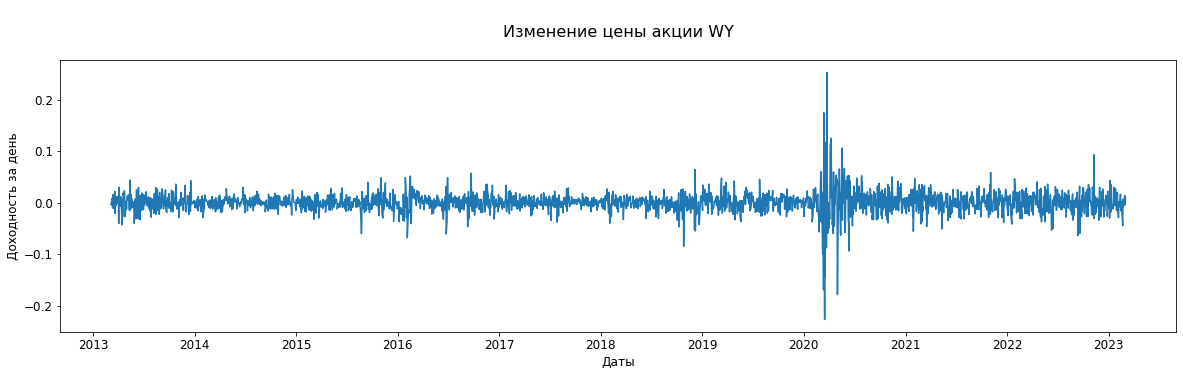

In [996]:
X = df_prices_return.index
for i in random_cols:
    Y = df_prices_return[i]
    plt.plot(X, Y)
    plt.title(f'\nИзменение цены акции {i}\n')
    plt.xlabel("Даты")
    plt.ylabel("Доходность за день")
    plt.show()

In [997]:
params = {'legend.fontsize': 12,
          'figure.figsize': (10, 7),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

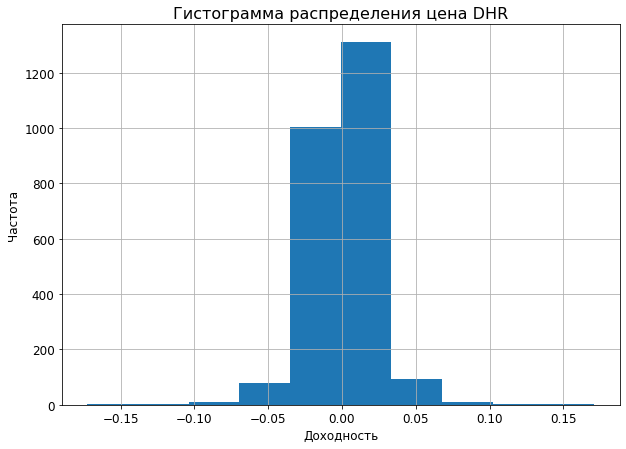

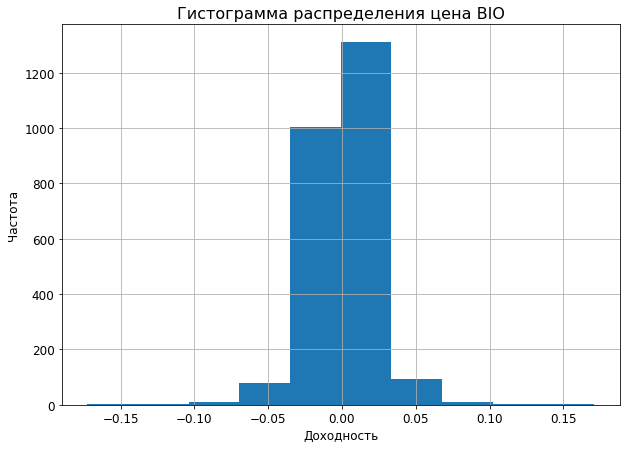

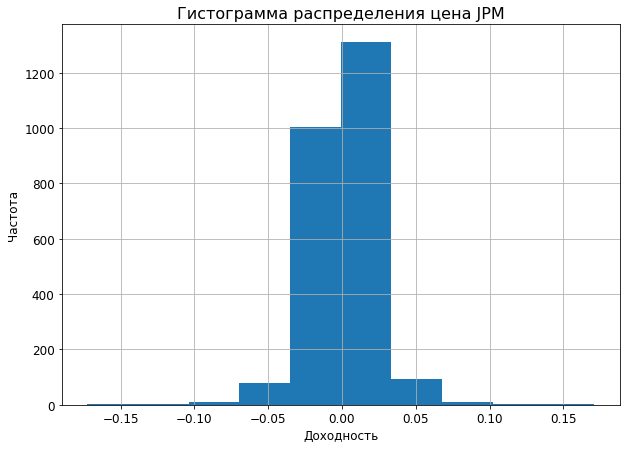

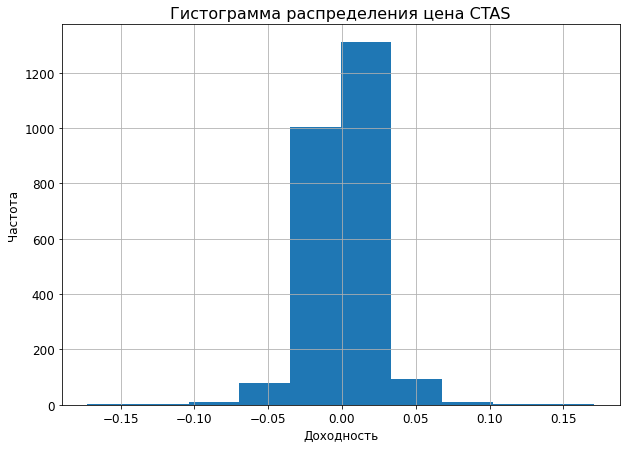

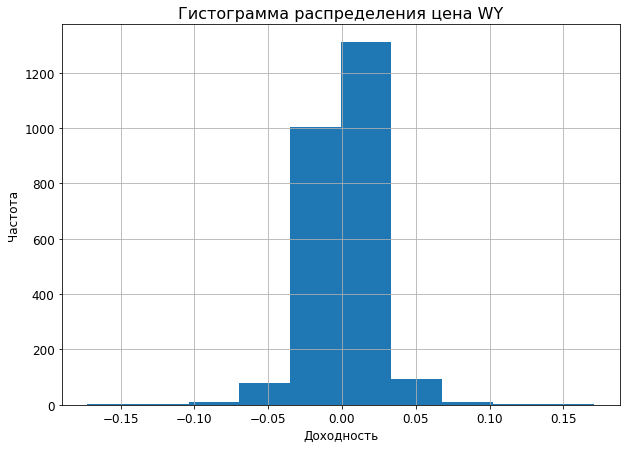

In [998]:
for i in random_cols:
    df_prices_return['HPQ'].hist(bins = 10)
    plt.title(f"Гистограмма распределения цена {i}")
    plt.xlabel("Доходность")
    plt.ylabel("Частота")
    plt.show()

In [999]:
params = {'legend.fontsize': 12,
          'figure.figsize': (10, 10),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

<AxesSubplot:>

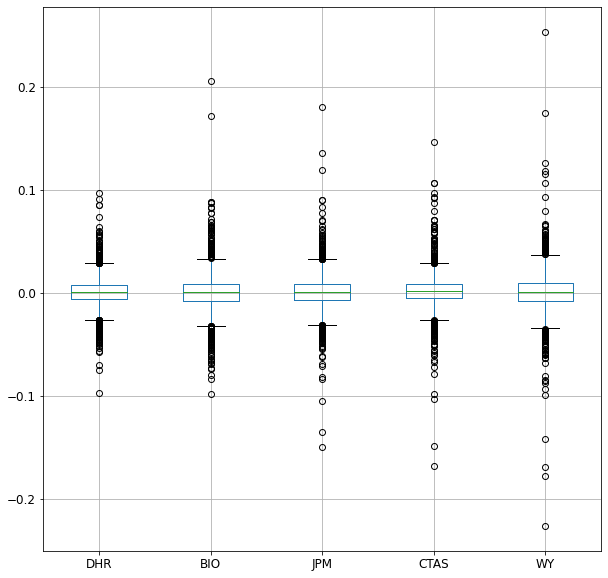

In [1000]:

df_prices_return.boxplot(column=random_cols)


__Ответ__:

1) На гистограммах видно, что распределение напоминает нормальное в середине, но хвосты совсем не плавные, то есть есть довольно сильное отклонение у хвостов от нормального распределения.

2) По ящику с усами видно, что выбросов действительно много, так как много значений находятся за пределами ящика.


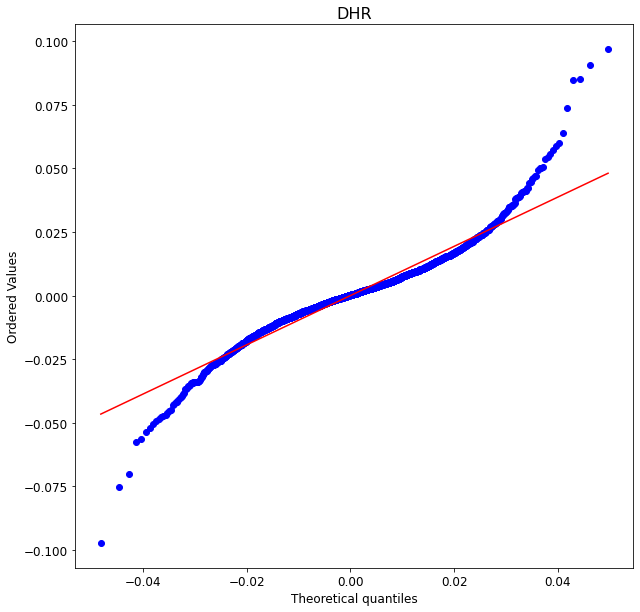

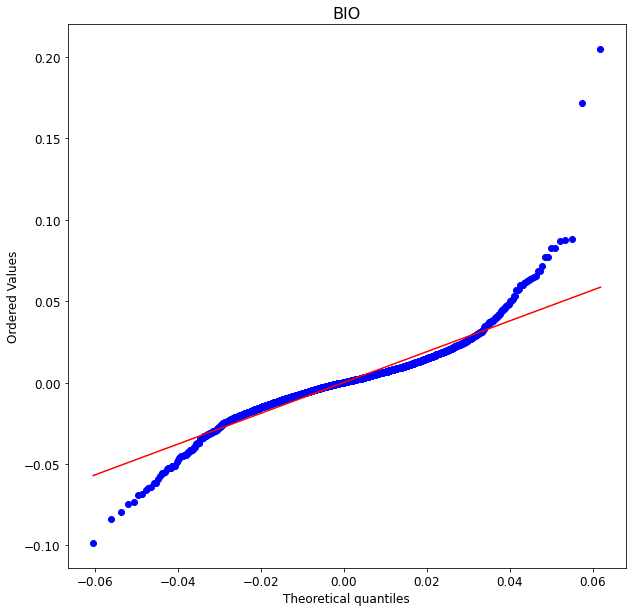

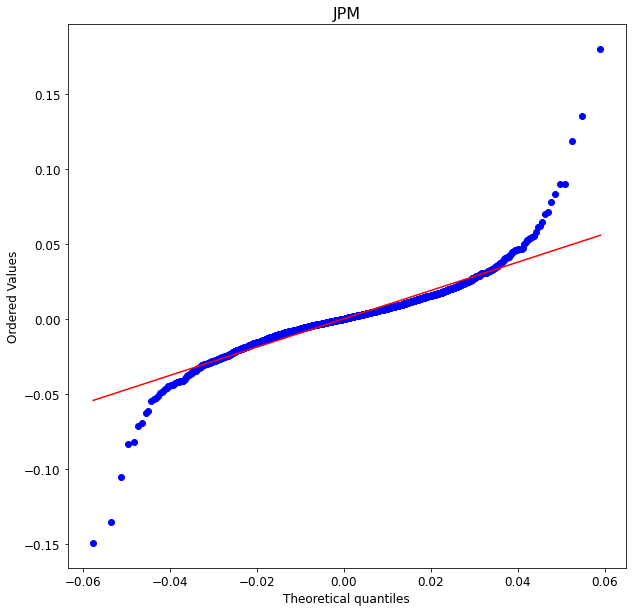

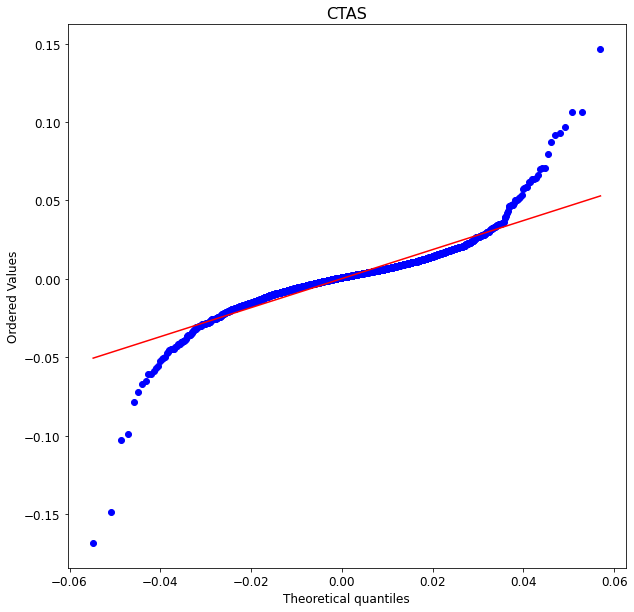

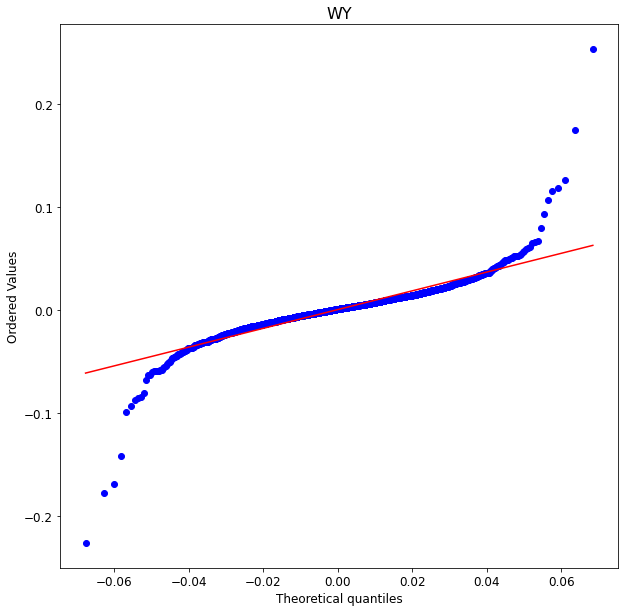

In [1001]:
for i in random_cols:
    ax = plt.subplot(111)
    x = df_prices_return[i].values
    sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);
    plt.title(f"{i}")
    plt.show()

Рассуждения из предыдущего пункта подтвердились с помощью диаграмм квантиль-квантиль (в середине распределение напоминает нормальное, а хвосты сильно отличаются от него)

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [1002]:
df_train = df_prices_return[df_prices_return.index  < '2022-03-03']
df_test = df_prices_return[df_prices_return.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [1003]:
mean_train= df_train.mean().to_frame()

In [1004]:
mean_train.reset_index(inplace= True )

In [1005]:
w = sorted(mean_train[0])

In [1006]:
w_min = w[:10]

In [1007]:
w_max = w[-10:]
w_max

[0.002606341073047103,
 0.0027463220328892463,
 0.0027618309664175257,
 0.0029177186473005874,
 0.003140186148039413,
 0.0031493683145610656,
 0.003781942250509944,
 0.003882177331098096,
 0.004681509876622557,
 0.006476909956001321]

In [1008]:
mean_train.loc[mean_train[0].isin(w_min)] #10 наименее доходных компаний

,index,0
62,BEN,0.000105
200,GE,0.000021
235,IBM,0.000060
266,KHC,-0.000037
270,KMI,0.000071
289,LUMN,0.000060
405,RIVN,-0.005722
426,SLB,0.000087
488,VTRS,-0.000168
493,WBD,0.000149


In [1009]:
mean_train.loc[mean_train[0].isin(w_max)] # 10 наиболее доходных компаний

,index,0
78,CARR,0.003140
89,CEG,0.006477
116,CRWD,0.002606
131,DDOG,0.003149
162,ENPH,0.002918
202,GFS,0.003782
275,LCID,0.004682
322,MRNA,0.003882
463,TSLA,0.002746
518,ZS,0.002762


Среди самых доходных есть Тесла.

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

#### Считаем стандартное отклонение

In [1010]:
std_train = df_train.std().to_frame()

In [1011]:
std_train.reset_index(inplace= True )

In [1012]:
std_train = std_train.sort_values(by = 0)

In [1013]:
std_train.head(10) # 10 самых безрисковых компаний

,index,0
489,VZ,0.011099
259,JNJ,0.011255
272,KO,0.011309
376,PG,0.011339
413,RSG,0.011408
500,WM,0.011432
373,PEP,0.011443
97,CL,0.011778
313,MMC,0.012117
110,COST,0.012303


In [1014]:
std_train.tail(10)# 10 самых рискованных компаний 

,index,0
131,DDOG,0.039034
116,CRWD,0.039878
419,SEDG,0.040310
202,GFS,0.041315
517,ZM,0.042788
370,PDD,0.045639
322,MRNA,0.052030
162,ENPH,0.052601
275,LCID,0.066841
405,RIVN,0.072406


Тут Теслы не наблюдается.

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

#### Доходность-риск

In [1015]:
mean_train= df_train.mean().to_frame()

In [1016]:
mean_train

,0
A,0.000808
AAL,0.000579
AAP,0.000659
AAPL,0.001268
ABBV,0.000925
...,...
ZBRA,0.001256
ZION,0.000733
ZM,0.001823
ZS,0.002762


In [1017]:
std_train = df_train.std().to_frame()

In [1018]:
df_result = std_train.merge(mean_train, on = mean_train.index, how='left')

In [1019]:
df_result

,key_0,0_x,0_y
0,A,0.015556,0.000808
1,AAL,0.031476,0.000579
2,AAP,0.020050,0.000659
3,AAPL,0.017579,0.001268
4,ABBV,0.017331,0.000925
...,...,...,...
515,ZBRA,0.023282,0.001256
516,ZION,0.020683,0.000733
517,ZM,0.042788,0.001823
518,ZS,0.037999,0.002762


In [1020]:
df_result1 = df_result.set_index('key_0')
df_result1

,0_x,0_y
key_0,,
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925
...,...,...
ZBRA,0.023282,0.001256
ZION,0.020683,0.000733
ZM,0.042788,0.001823


In [1021]:
df_result1 = df_result1.rename(columns = {'0_x':'std', '0_y':'r'})

In [1022]:
df_result1

,std,r
key_0,,
A,0.015556,0.000808
AAL,0.031476,0.000579
AAP,0.020050,0.000659
AAPL,0.017579,0.001268
ABBV,0.017331,0.000925
...,...,...
ZBRA,0.023282,0.001256
ZION,0.020683,0.000733
ZM,0.042788,0.001823


In [1023]:
tsla = df_result1[df_result1.index == 'TSLA']

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

In [1024]:
params = {'legend.fontsize': 12,
          'figure.figsize': (20, 15),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

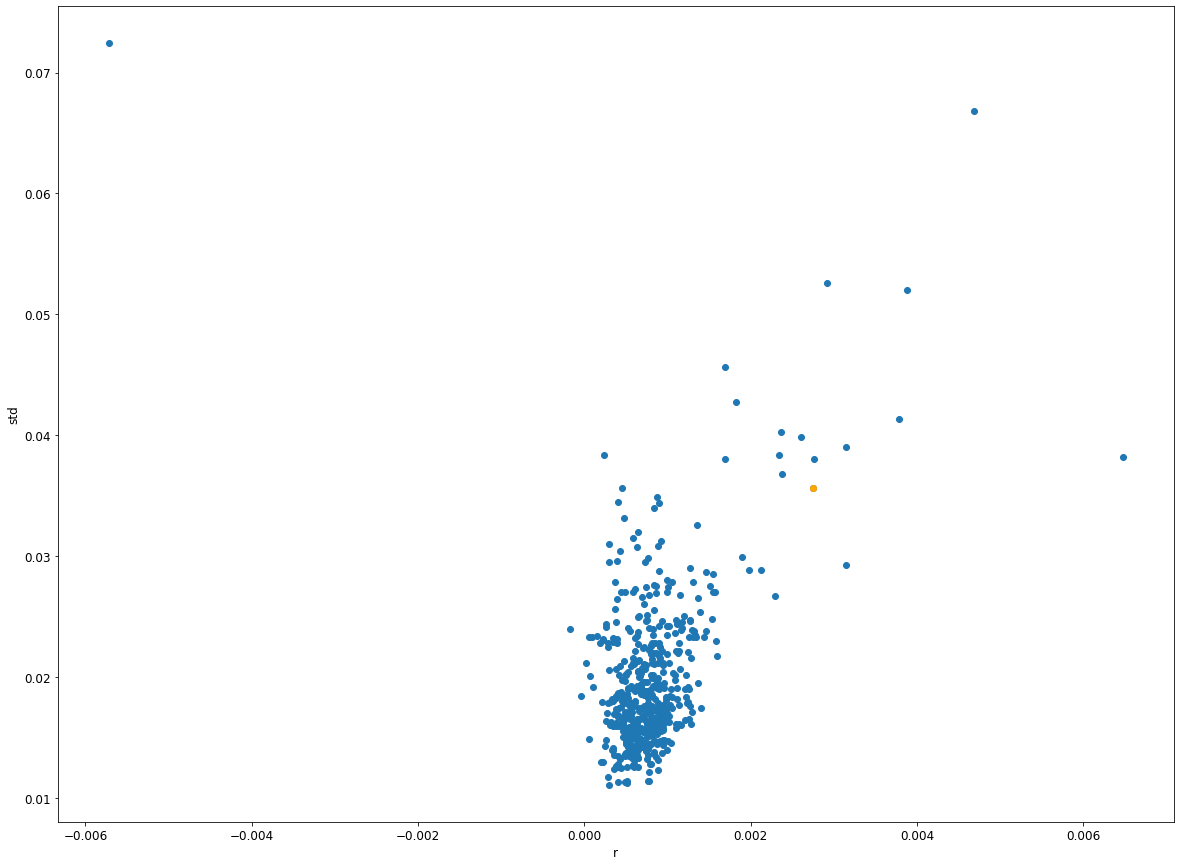

In [1025]:
plt.scatter(df_result1['r'], df_result1['std'])
plt.scatter(tsla['r'],tsla['std'], color = 'orange') #Тесла отмечена оранжевым цветом
plt.xlabel('r')
plt.ylabel('std')
plt.show()

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 


Нет, если посмотреть на график, то мы должны смотреть на точки, где r = const, а стандартное отклонение меньше - таких точек на графике нет.

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [1026]:
df_quan0 = (df_train.quantile(0.05)*(-1)).to_frame()

In [1027]:
df_quan0

,0.05
A,0.025164
AAL,0.044087
AAP,0.026499
AAPL,0.025629
ABBV,0.024926
...,...
ZBRA,0.030612
ZION,0.030714
ZM,0.061953
ZS,0.055926


In [1028]:
df_result = df_result1.merge(df_quan0, on = df_quan0.index, how='left')

In [1029]:
df_result

,key_0,std,r,0.05
0,A,0.015556,0.000808,0.025164
1,AAL,0.031476,0.000579,0.044087
2,AAP,0.020050,0.000659,0.026499
3,AAPL,0.017579,0.001268,0.025629
4,ABBV,0.017331,0.000925,0.024926
...,...,...,...,...
515,ZBRA,0.023282,0.001256,0.030612
516,ZION,0.020683,0.000733,0.030714
517,ZM,0.042788,0.001823,0.061953
518,ZS,0.037999,0.002762,0.055926


In [1030]:
df_result = df_result.set_index('key_0')

In [1031]:
df_result.index.name = None

In [1032]:
df_result = df_result.rename(columns = {0.05:'VaR'})

In [1033]:
df_result

,std,r,VaR
A,0.015556,0.000808,0.025164
AAL,0.031476,0.000579,0.044087
AAP,0.020050,0.000659,0.026499
AAPL,0.017579,0.001268,0.025629
ABBV,0.017331,0.000925,0.024926
...,...,...,...
ZBRA,0.023282,0.001256,0.030612
ZION,0.020683,0.000733,0.030714
ZM,0.042788,0.001823,0.061953
ZS,0.037999,0.002762,0.055926


In [1034]:
df_result_min = df_result[df_result['VaR'] < sorted(df_result['VaR'])[10]]

In [1035]:
df_result_min #Вот 10 самых безрисковых компаний

,std,r,VaR
CL,0.011778,0.000284,0.016865
JNJ,0.011255,0.000507,0.015890
KO,0.011309,0.000402,0.015495
MCD,0.012586,0.000596,0.015866
PEP,0.011443,0.000513,0.015868
PG,0.011339,0.000487,0.015249
RSG,0.011408,0.000767,0.015696
SO,0.013247,0.000425,0.016385
VZ,0.011099,0.000295,0.016457
WM,0.011432,0.000776,0.015233


In [1036]:
df_result_max = df_result[df_result['VaR'] > sorted(df_result['VaR'])[-11]]

In [1037]:
df_result_max # А вот 10 самых рискованных

,std,r,VaR
CEG,0.038244,0.006477,0.058496
DDOG,0.039034,0.003149,0.056923
ENPH,0.052601,0.002918,0.073849
GFS,0.041315,0.003782,0.060479
LCID,0.066841,0.004682,0.075715
MRNA,0.052030,0.003882,0.072876
PDD,0.045639,0.001691,0.065768
RIVN,0.072406,-0.005722,0.106831
SEDG,0.040310,0.002359,0.055984
ZM,0.042788,0.001823,0.061953


$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [1038]:
df_prices_return

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


In [1039]:
df_r_tesla = df_prices_return[df_prices_return['TSLA'] < df_prices_return['TSLA'].quantile(0.05)]

In [1040]:
df_r_tesla['TSLA'].mean() #ES для Теслы, что произойдет с доходностью в среднем, если мы вложимся в Теслу в 5% худших дней.

-0.0792928649480202

In [1041]:
df_r_tesla1 = df_prices_return[df_prices_return['TSLA'] > df_prices_return['TSLA'].quantile(0.95)]

In [1042]:
df_r_tesla1['TSLA'].mean()#ES для Теслы, что произойдет с доходностью в среднем, если мы вложимся в Теслу в 5% лучших дней.

0.09371420759358597

#### Если рассматривать с точки зрения вложения 1000 долларов, то в 5% худших дней мы потреряем примерно 79 долларов, а в 5% лучших дней мы заработаем почти 94 доллара за день.

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [1043]:
df_es = (df_prices_return[df_prices_return < df_prices_return.quantile(0.05)].mean()).to_frame()

In [1044]:
df_es = df_es.rename(columns = {0: 'ES'})

In [1045]:
df_es

,ES
A,-0.037452
AAL,-0.068559
AAP,-0.046033
AAPL,-0.041315
ABBV,-0.039938
...,...
ZBRA,-0.054454
ZION,-0.046502
ZM,-0.086836
ZS,-0.086942


In [1046]:
df_result = df_result.merge(df_es, on = df_result.index, how='left')

In [1047]:
df_result = df_result.set_index('key_0')

In [1048]:
df_result.index.name = None

In [1049]:
df_result 

,std,r,VaR,ES
A,0.015556,0.000808,0.025164,-0.037452
AAL,0.031476,0.000579,0.044087,-0.068559
AAP,0.020050,0.000659,0.026499,-0.046033
AAPL,0.017579,0.001268,0.025629,-0.041315
ABBV,0.017331,0.000925,0.024926,-0.039938
...,...,...,...,...
ZBRA,0.023282,0.001256,0.030612,-0.054454
ZION,0.020683,0.000733,0.030714,-0.046502
ZM,0.042788,0.001823,0.061953,-0.086836
ZS,0.037999,0.002762,0.055926,-0.086942


In [1050]:
df_result.loc[:,'ES'] *= -1 #https://utyatnishna.ru/info/264783/python-pandas-dataframe-how-to-multiply-entire-column-with-a-scalar?ysclid=lfvhz0n244808825184

In [1051]:
df_result

,std,r,VaR,ES
A,0.015556,0.000808,0.025164,0.037452
AAL,0.031476,0.000579,0.044087,0.068559
AAP,0.020050,0.000659,0.026499,0.046033
AAPL,0.017579,0.001268,0.025629,0.041315
ABBV,0.017331,0.000925,0.024926,0.039938
...,...,...,...,...
ZBRA,0.023282,0.001256,0.030612,0.054454
ZION,0.020683,0.000733,0.030714,0.046502
ZM,0.042788,0.001823,0.061953,0.086836
ZS,0.037999,0.002762,0.055926,0.086942


In [1052]:
df_result = df_result.round(3)

In [1053]:
df_result_1 = df_result.sort_values(by='ES', ascending=False)


In [1054]:
df_result_1.reset_index(inplace= True)

In [1055]:
df_result_1 = df_result_1.rename(columns = {'index': 'Ticker'})

In [1056]:
df_result_1

,Ticker,std,r,VaR,ES
0,RIVN,0.072,-0.006,0.107,0.121
1,LCID,0.067,0.005,0.076,0.119
2,ENPH,0.053,0.003,0.074,0.104
3,PDD,0.046,0.002,0.066,0.100
4,MRNA,0.052,0.004,0.073,0.098
...,...,...,...,...,...
515,RSG,0.011,0.001,0.016,0.027
516,PG,0.011,0.000,0.015,0.027
517,VZ,0.011,0.000,0.016,0.026
518,PEP,0.011,0.001,0.016,0.026


In [1057]:
var_result1 = df_result_1.to_csv(r'C:\Users\79150\Documents\GitHub\andan_2023\hw\var_result.csv', index= False)

Записали нужный файл.
Ссылка на успешный контест: https://contest.yandex.ru/contest/47242/run-report/84931097/

Ник: dap_econ_2022_201

## 1.3 VaR-кривая

**з)**

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [1058]:
df_prices_return

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


In [1059]:
return_tsla = df_prices_return['TSLA']

In [1060]:
return_tsla = return_tsla.to_frame()

In [1061]:
return_tsla # табличка доходности Теслы по дням

,TSLA
Date,
2013-03-06,0.028377
2013-03-07,0.014327
2013-03-08,0.006278
2013-03-11,0.016376
2013-03-12,0.000511
...,...
2023-02-27,0.054602
2023-02-28,-0.009247
2023-03-01,-0.014292


In [1062]:
df_1 = return_tsla[return_tsla.index  < '2017-03-06'] # берем первые 4 года

In [1063]:
df_1 

,TSLA
Date,
2013-03-06,0.028377
2013-03-07,0.014327
2013-03-08,0.006278
2013-03-11,0.016376
2013-03-12,0.000511
...,...
2017-02-27,-0.041907
2017-02-28,0.015270
2017-03-01,0.000120


In [1064]:
df_1.quantile(0.05) #оценка для Н+1 

TSLA   -0.044778
Name: 0.05, dtype: float64

In [1065]:
c = len(return_tsla) - len(df_1)
nachalo = 0
end = len(df_1)
#var = dict()
date = []
varr = []
k = 0
while c != 0:
    #print(c)
    #print(nachalo)
    #print(end)
    ex = return_tsla[nachalo:end]
    q = ex.quantile(0.05)
    #var[return_tsla.index[nachalo + len(ex)]] = q
    date.append(return_tsla.index[nachalo + len(ex)])
    varr.append(q)
    a = return_tsla['TSLA'][nachalo + len(ex)]
    #print(a<q)
    if (a < q).values[0]:
        k += 1
    nachalo +=1
    end +=1
    c -=1
    
k # кол-во пробитых значений при использовании меняющегося VaR  
#varr

102

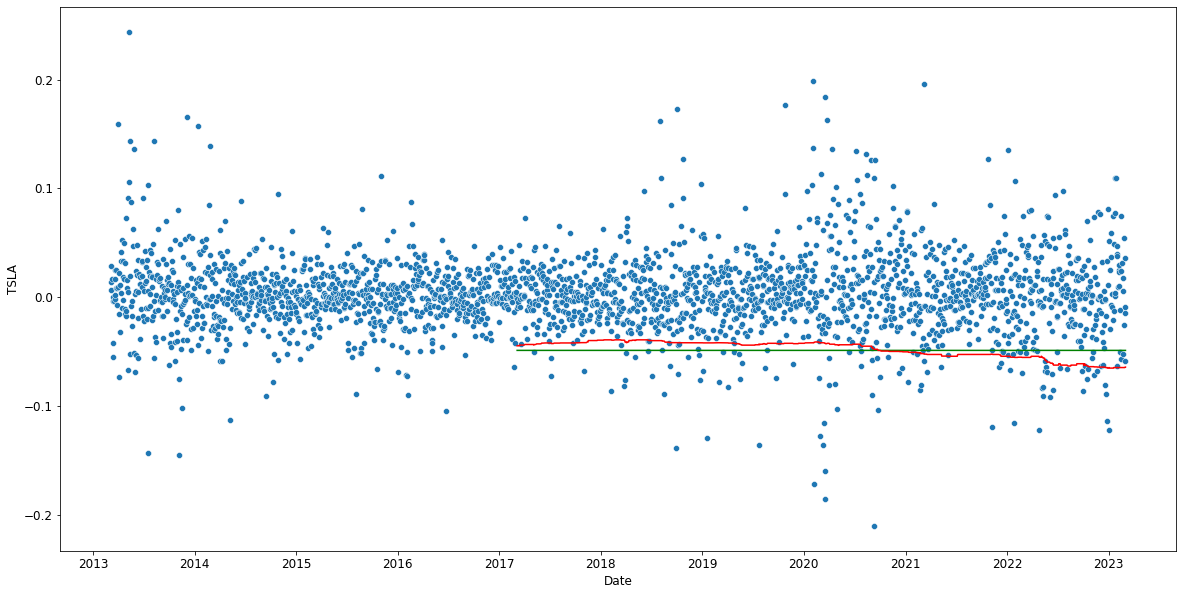

In [1066]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=return_tsla, x='Date',y='TSLA')
plt.plot(date, [-df_result['VaR']['TSLA']]*len(date), color = 'green')
plt.plot(date, varr, color = 'red')
# зеленая линия - это VaR-константа, красная - меняющаяся

In [1067]:
b = 0
for i in return_tsla['TSLA'][c:]:
    if i < -df_result['VaR']['TSLA']:
        b+=1
b #было столько значений за период с опр числа в 2017 году, которые были меньше -0.05. Пробитые значения при VaR константе

152

**Итог:** про прогнозировании VaR точек за пределами VaR стало меньше.
